In [23]:
import pandas as pd
from utils import get_Xy, preprocess, model_generator, evaluate

# Needed for decision tree visualization
import sklearn.tree as tree
import pydotplus
from IPython.display import Image

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
df = pd.read_csv('../data/predictive_maintenance.csv')

In [ ]:
# X_train, X_test, y_train, y_test = get_Xy(df, 'Failure Type', binary=['No Failure'], drop_cols=['UDI', 'Product ID'])
X_train, X_test, y_train, y_test = get_Xy(df, 'Target', drop_cols=['UDI', 'Product ID', 'Failure Type'])

In [ ]:
# preprocessor = preprocess(X_train, y_train, label_cols=['Target'])
preprocessor = preprocess(X_train, y_train)

In [ ]:
preprocessor[1]

In [ ]:
# Manually preprocessing the data so that other group members can use it to compare output from their pipelines
cols = dict(zip(range(8), ['H', 'L', 'M'] + list(df.columns[3:])))

X_train_transformed = pd.DataFrame(preprocessor[1].fit_transform(X_train))
X_train_transformed = X_train_transformed.rename(columns=cols)
X_train_transformed.to_pickle("X_train_transformed.pickle")

X_test_transformed = pd.DataFrame(preprocessor[1].transform(X_test))
X_test_transformed = X_test_transformed.rename(columns=cols)
X_test_transformed.to_pickle("X_test_transformed.pickle")

In [ ]:
# TO LOAD PROCESSED DATA
# X_train_transformed = pd.read_pickle("X_train_transformed.pickle")
# X_test_transformed = pd.read_pickle("X_test_transformed.pickle")

In [ ]:
X_train_transformed

In [ ]:
# try:
#     pipelines = pd.read_pickle("pipeline.pickle")
#     print("reading pipeline from file")
# except:
    # print("writing pipeline to file")
pipelines = model_generator(X_train, y_train, preprocessor, models=None)

In [18]:
evals = evaluate(pipelines, X_test, y_test)

score 0.822
score 0.822
score 0.822
score 0.848
score 0.848
score 0.848
score 0.876
score 0.876
score 0.876
score 0.892
score 0.892
score 0.892
score 0.885
score 0.885
score 0.885
score 0.915
score 0.915
score 0.915
score 0.8905
score 0.8905
score 0.8905
score 0.8775
score 0.8775
score 0.8775
score 0.8055
score 0.8055
score 0.8055


In [ ]:
for model, samplers in evals.items():
    print(model, '-' * (60 - len(model)))
    print()
    for sample, report in samplers.items():
        print(sample, end="  |  ") 
        print("\n")
        print(report) 
    print("\n")

In [ ]:
# Multiclass classification
# X_train, X_test, y_train, y_test = get_Xy(df, 'Target', drop_cols=['UDI', 'Product ID', 'Failure Type'])

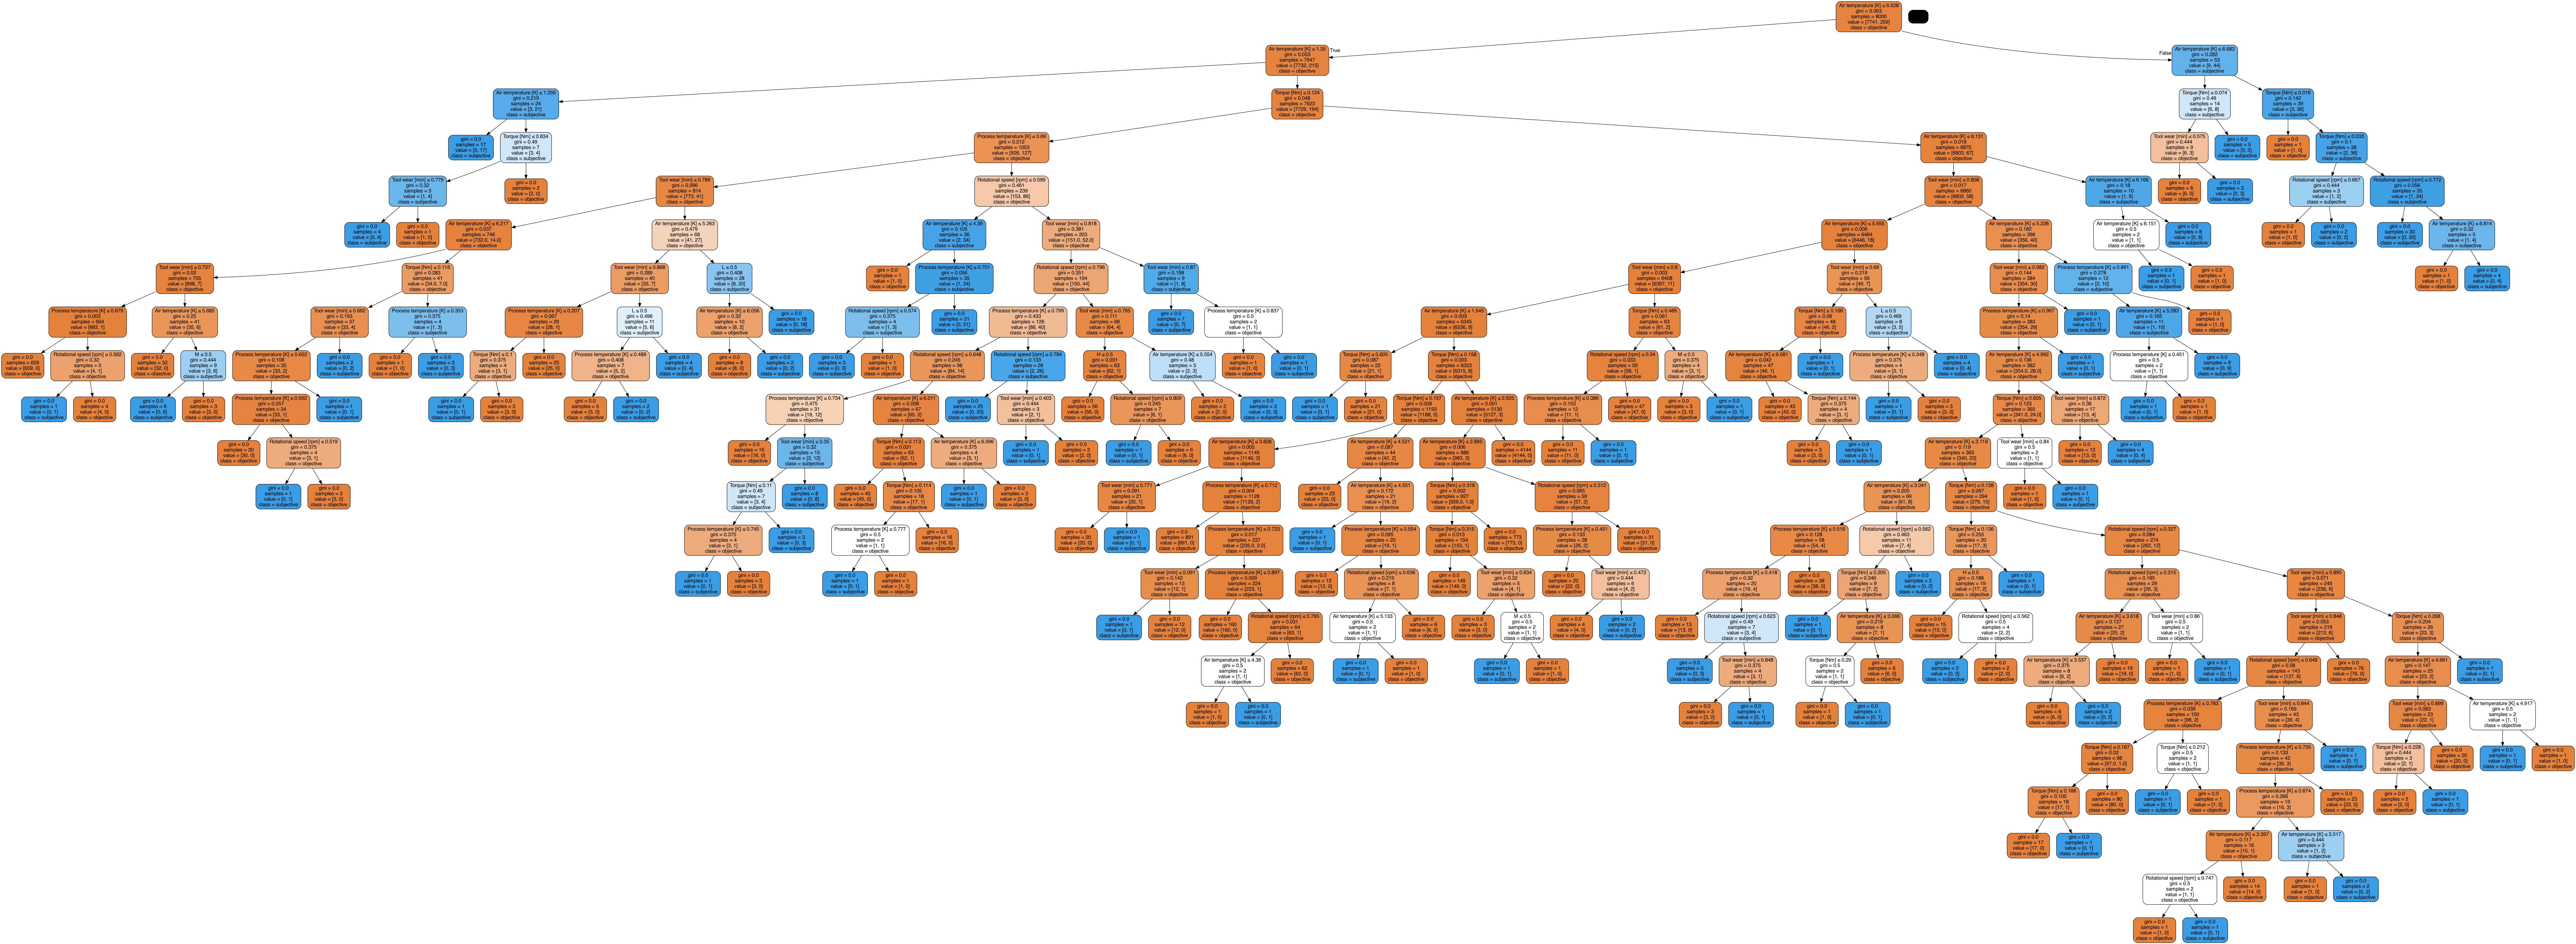

In [24]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_transformed, y_train)
clf.score(X_train_transformed, y_train)

# Create a decision tree graph
dot_data = tree.export_graphviz(
    clf, out_file=None,
    feature_names=X_train_transformed.columns,
    class_names=["objective","subjective"],
    filled=True, rounded=True,
    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('DT.png')

# Show graph
Image(graph.create_png())